BluEx is a leading logistics company in India.  It's known for efficient delivery of 
packets to customers.  However BluEx is facing a challenge where its van drivers are taking a 
suboptimal path for delivery.  This is causing delays and higher fuel cost.
You as ML expert have to create a ML model using Reinforcement Learning so that 
efficient path is found through the program. 

In [1]:
import numpy as np
import pylab as plt
import networkx as nx
#Initializing points
points_list = [(0,1), (1,5), (5,6), (5,4), (1,2), (2,3)]
 


In [2]:

# R matrix
R = np.matrix([ [-1,-1,-1,-1,0,-1],
               [-1,-1,-1,0,-1,100],
               [-1,-1,-1,0,-1,-1],
               [-1,0,0,-1,0,-1],
               [-1,0,0,-1,-1,100],
               [-1,0,-1,-1,0,100] ])
print(R)

[[ -1  -1  -1  -1   0  -1]
 [ -1  -1  -1   0  -1 100]
 [ -1  -1  -1   0  -1  -1]
 [ -1   0   0  -1   0  -1]
 [ -1   0   0  -1  -1 100]
 [ -1   0  -1  -1   0 100]]


In [3]:
NO_OF_POINTS = 6
goal = 6

In [4]:
Q = np.matrix(np.zeros([NO_OF_POINTS,NO_OF_POINTS]))
 
# The learning parameter
gamma = 0.8
 
initial_state = 1
 
print(Q)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [5]:
# This function returns all available actions in the state given as # an argument
def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act
# Get available actions in the current state
available_act = available_actions(initial_state)
# This function chooses at random which action to be performed within the range of all the available actions
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action
# Sample next action to be performed
action = sample_next_action(available_act)

In [6]:
# This function updates the Q matrix according to the path selected and the Q learning algorithm
def update(current_state, action, gamma):  
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]   
    Q[current_state, action] = R[current_state, action] + gamma * max_value
    print('max_value', R[current_state, action] + gamma * max_value)
 
    if (np.max(Q) >= 0):
        return(np.sum(Q/np.max(Q)*100))
    else:
        return (0)
 
update(initial_state,action,gamma)
print(Q)

max_value 0.0
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


In [7]:
# Train over 10 000 iterations(Re-iterate the # process above)
scores = []
for i in range(10000):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    update(current_state,action,gamma)
    score = update(current_state,action,gamma)
    scores.append(score)
print ('Score:', str(score))
print(Q)

max_value 0.0
max_value 0.0
max_value 100.0
max_value 180.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 244.0
max_value 295.20000000000005
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 336.1600000000001
max_value 368.92800000000005
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 395.14240000000007
max_value 395.14240000000007
max_value 395.14240000000007
max_value 416.11392000000006
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 432.8911360000001
max_value 446.31290880000006
max_value 457.05032704000007
max_value 457.05032704000007
max_value 316.11392

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


max_value 397.63881675856527
max_value 397.63881675856527
max_value 498.7910741803855
max_value 498.7910741803855
max_value 397.63881675856527
max_value 397.63881675856527
max_value 399.03285934430846
max_value 399.03285934430846
max_value 498.7910741803855
max_value 498.7910741803855
max_value 318.7910741803855
max_value 318.7910741803855
max_value 318.7910741803855
max_value 318.7910741803855
max_value 318.7910741803855
max_value 318.7910741803855
max_value 399.03285934430846
max_value 399.03285934430846
max_value 399.03285934430846
max_value 399.03285934430846
max_value 318.7910741803855
max_value 318.7910741803855
max_value 498.7910741803855
max_value 499.03285934430846
max_value 318.7910741803855
max_value 318.7910741803855
max_value 397.63881675856527
max_value 397.63881675856527
max_value 499.2262874754468
max_value 499.2262874754468
max_value 499.2262874754468
max_value 499.2262874754468
max_value 255.03285934430843
max_value 255.03285934430843
max_value 399.3810299803574
max_v

max_value 399.99707699672547
max_value 399.99707699672547
max_value 399.99707699672547
max_value 399.99707699672547
max_value 319.9976615973804
max_value 319.9976615973804
max_value 399.99707699672547
max_value 399.99707699672547
max_value 319.9976615973804
max_value 319.9976615973804
max_value 499.9963462459068
max_value 499.9963462459068
max_value 319.9976615973804
max_value 319.9976615973804
max_value 499.9963462459068
max_value 499.9963462459068
max_value 399.99707699672547
max_value 399.99707699672547
max_value 255.99812927790433
max_value 255.99812927790433
max_value 255.99812927790433
max_value 255.99812927790433
max_value 399.99707699672547
max_value 399.99707699672547
max_value 255.99812927790433
max_value 255.99812927790433
max_value 399.99707699672547
max_value 399.99707699672547
max_value 399.99707699672547
max_value 399.99707699672547
max_value 499.9963462459068
max_value 499.9963462459068
max_value 399.99707699672547
max_value 399.99707699672547
max_value 399.997076996725

max_value 399.9999985178614
max_value 399.9999985178614
max_value 319.99999881428914
max_value 319.99999881428914
max_value 319.99999881428914
max_value 319.99999881428914
max_value 499.9999981473267
max_value 499.9999981473267
max_value 399.9999985178614
max_value 399.9999985178614
max_value 255.99999905143133
max_value 255.99999905143133
max_value 399.9999985178614
max_value 399.9999985178614
max_value 255.99999905143133
max_value 255.99999905143133
max_value 319.99999881428914
max_value 319.99999881428914
max_value 499.9999981473267
max_value 499.9999981473267
max_value 319.99999881428914
max_value 319.99999881428914
max_value 499.9999981473267
max_value 499.9999981473267
max_value 399.9999985178614
max_value 399.9999985178614
max_value 399.9999985178614
max_value 399.9999985178614
max_value 319.99999881428914
max_value 319.99999881428914
max_value 399.9999985178614
max_value 399.9999985178614
max_value 399.9999985178614
max_value 399.9999985178614
max_value 399.9999985178614
max_va

max_value 319.9999999997538
max_value 319.9999999997538
max_value 499.9999999996153
max_value 499.9999999996153
max_value 399.99999999969225
max_value 399.99999999969225
max_value 399.99999999969225
max_value 399.99999999969225
max_value 319.9999999997538
max_value 319.9999999997538
max_value 399.99999999969225
max_value 399.99999999969225
max_value 399.99999999969225
max_value 399.99999999969225
max_value 319.9999999997538
max_value 319.9999999997538
max_value 399.99999999969225
max_value 399.99999999969225
max_value 319.9999999997538
max_value 319.9999999997538
max_value 399.99999999969225
max_value 399.99999999969225
max_value 399.99999999969225
max_value 399.99999999969225
max_value 319.9999999997538
max_value 319.9999999997538
max_value 399.99999999969225
max_value 399.99999999969225
max_value 499.9999999996153
max_value 499.9999999996153
max_value 399.99999999969225
max_value 399.99999999969225
max_value 499.9999999996153
max_value 499.99999999969225
max_value 399.99999999969225


max_value 400.0
max_value 400.0
max_value 256.0
max_value 256.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 256.0
max_value 256.0
max_value 256.0
max_value 256.0
max_value 256.0
max_value 256.0
max_value 400.0
max_value 400.0
max_value 256.0
max_value 256.0
max_value 500.0
max_value 500.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_value 500.0
max_value 500.0
max_value 500.0
max_value 500.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_valu

max_value 400.0
max_value 400.0
max_value 256.0
max_value 256.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 256.0
max_value 256.0
max_value 400.0
max_value 400.0
max_value 256.0
max_value 256.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 256.0
max_value 256.0
max_value 320.0
max_value 320.0
max_value 500.0
max_value 500.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 500.0
max_value 500.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 256.0
max_value 256.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 256.0
max_value 256.0
max_value 500.0
max_value 500.0
max_value 500.0
max_value 500.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_value 500.0
max_value 500.0
max_valu

max_value 400.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_value 500.0
max_value 500.0
max_value 320.0
max_value 320.0
max_value 500.0
max_value 500.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 500.0
max_value 500.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 256.0
max_value 256.0
max_value 256.0
max_value 256.0
max_value 500.0
max_value 500.0
max_value 320.0
max_value 320.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 500.0
max_value 500.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 500.0
max_value 500.0
max_value 500.0
max_value 500.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 256.0
max_value 256.0
max_value 500.0
max_value 500.0
max_value 320.0
max_valu

max_value 500.0
max_value 256.0
max_value 256.0
max_value 320.0
max_value 320.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 500.0
max_value 500.0
max_value 320.0
max_value 320.0
max_value 500.0
max_value 500.0
max_value 400.0
max_value 400.0
max_value 256.0
max_value 256.0
max_value 320.0
max_value 320.0
max_value 256.0
max_value 256.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 500.0
max_value 500.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 256.0
max_value 256.0
max_value 256.0
max_value 256.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 500.0
max_value 500.0
max_value 400.0
max_value 400.0
max_value 500.0
max_value 500.0
max_value 320.0
max_value 320.0
max_value 256.0
max_value 256.0
max_value 256.0
max_valu

max_value 400.0
max_value 256.0
max_value 256.0
max_value 256.0
max_value 256.0
max_value 320.0
max_value 320.0
max_value 500.0
max_value 500.0
max_value 500.0
max_value 500.0
max_value 320.0
max_value 320.0
max_value 320.0
max_value 320.0
max_value 500.0
max_value 500.0
max_value 256.0
max_value 256.0
max_value 320.0
max_value 320.0
max_value 320.0
max_value 320.0
max_value 500.0
max_value 500.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_value 500.0
max_value 500.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 500.0
max_value 500.0
max_value 320.0
max_valu

max_value 500.0
max_value 500.0
max_value 500.0
max_value 500.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 500.0
max_value 500.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 256.0
max_value 256.0
max_value 500.0
max_value 500.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 500.0
max_value 500.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 256.0
max_value 256.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_value 320.0
max_value 320.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_value 256.0
max_value 256.0
max_value 400.0
max_value 400.0
max_value 500.0
max_value 500.0
max_valu

max_value 320.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_value 500.0
max_value 500.0
max_value 500.0
max_value 500.0
max_value 256.0
max_value 256.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 256.0
max_value 256.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 500.0
max_value 500.0
max_value 400.0
max_value 400.0
max_value 256.0
max_value 256.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 256.0
max_value 256.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_value 256.0
max_valu

max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_value 320.0
max_value 320.0
max_value 256.0
max_value 256.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 500.0
max_value 500.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 500.0
max_value 500.0
max_value 500.0
max_value 500.0
max_valu

max_value 500.0
max_value 500.0
max_value 500.0
max_value 500.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 256.0
max_value 256.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 500.0
max_value 500.0
max_value 256.0
max_value 256.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 256.0
max_value 256.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_valu

max_value 400.0
max_value 400.0
max_value 500.0
max_value 500.0
max_value 500.0
max_value 500.0
max_value 500.0
max_value 500.0
max_value 500.0
max_value 500.0
max_value 320.0
max_value 320.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_value 500.0
max_value 500.0
max_value 400.0
max_value 400.0
max_value 256.0
max_value 256.0
max_value 256.0
max_value 256.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 500.0
max_value 500.0
max_value 256.0
max_value 256.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 500.0
max_value 500.0
max_value 400.0
max_value 400.0
max_value 256.0
max_value 256.0
max_value 500.0
max_value 500.0
max_value 500.0
max_value 500.0
max_value 500.0
max_value 500.0
max_value 500.0
max_value 500.0
max_value 500.0
max_value 500.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_valu

max_value 500.0
max_value 500.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 500.0
max_value 500.0
max_value 400.0
max_value 400.0
max_value 256.0
max_value 256.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 500.0
max_value 500.0
max_value 500.0
max_value 500.0
max_value 320.0
max_value 320.0
max_value 256.0
max_value 256.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 500.0
max_value 500.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_value 500.0
max_value 500.0
max_value 320.0
max_value 320.0
max_value 500.0
max_value 500.0
max_value 400.0
max_value 400.0
max_value 256.0
max_value 256.0
max_value 500.0
max_value 500.0
max_valu

max_value 500.0
max_value 256.0
max_value 256.0
max_value 400.0
max_value 400.0
max_value 500.0
max_value 500.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_value 320.0
max_value 320.0
max_value 500.0
max_value 500.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_value 500.0
max_value 500.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 500.0
max_value 500.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 500.0
max_value 500.0
max_value 400.0
max_value 400.0
max_value 500.0
max_value 500.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_valu

max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 500.0
max_value 500.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 500.0
max_value 500.0
max_value 256.0
max_value 256.0
max_value 500.0
max_value 500.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 256.0
max_value 256.0
max_value 256.0
max_value 256.0
max_value 256.0
max_valu

max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_value 256.0
max_value 256.0
max_value 256.0
max_value 256.0
max_value 400.0
max_value 400.0
max_value 500.0
max_value 500.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_value 500.0
max_value 500.0
max_value 256.0
max_value 256.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 256.0
max_value 256.0
max_value 500.0
max_value 500.0
max_value 400.0
max_value 400.0
max_valu

max_value 256.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 256.0
max_value 256.0
max_value 320.0
max_value 320.0
max_value 500.0
max_value 500.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_value 500.0
max_value 500.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 500.0
max_value 500.0
max_value 500.0
max_value 500.0
max_value 320.0
max_value 320.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_value 320.0
max_value 320.0
max_value 500.0
max_valu

max_value 320.0
max_value 320.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_value 320.0
max_value 320.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 256.0
max_value 256.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 500.0
max_value 500.0
max_value 320.0
max_value 320.0
max_value 256.0
max_value 256.0
max_value 400.0
max_value 400.0
max_value 500.0
max_value 500.0
max_value 256.0
max_value 256.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 256.0
max_value 256.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_valu

max_value 500.0
max_value 256.0
max_value 256.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_value 256.0
max_value 256.0
max_value 320.0
max_value 320.0
max_value 500.0
max_value 500.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_value 256.0
max_value 256.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 500.0
max_value 500.0
max_value 256.0
max_value 256.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 256.0
max_value 256.0
max_value 500.0
max_value 500.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_valu

max_value 500.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_value 256.0
max_value 256.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 256.0
max_value 256.0
max_value 400.0
max_value 400.0
max_value 500.0
max_value 500.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_value 500.0
max_value 500.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_value 320.0
max_value 320.0
max_value 500.0
max_value 500.0
max_value 320.0
max_valu

max_value 320.0
max_value 320.0
max_value 320.0
max_value 320.0
max_value 500.0
max_value 500.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_value 256.0
max_value 256.0
max_value 256.0
max_value 256.0
max_value 256.0
max_value 256.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 256.0
max_value 256.0
max_value 400.0
max_value 400.0
max_value 500.0
max_value 500.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 500.0
max_value 500.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 500.0
max_value 500.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_valu

max_value 500.0
max_value 400.0
max_value 400.0
max_value 500.0
max_value 500.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_value 500.0
max_value 500.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 500.0
max_value 500.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_value 500.0
max_value 500.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_value 256.0
max_value 256.0
max_value 256.0
max_value 256.0
max_value 500.0
max_value 500.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_value 320.0
max_value 320.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 400.0
max_value 500.0
max_value 500.0
max_value 400.0
max_valu

max_value 320.0
max_value 256.0
max_value 256.0
max_value 500.0
max_value 500.0
max_value 400.0
max_value 400.0
max_value 500.0
max_value 500.0
max_value 320.0
max_value 320.0
max_value 400.0
max_value 400.0
max_value 320.0
max_value 320.0
max_value 256.0
max_value 256.0
max_value 400.0
max_value 400.0
max_value 500.0
max_value 500.0
max_value 500.0
max_value 500.0
max_value 320.0
max_value 320.0
Score: 1010.4
[[  0.   0.   0.   0. 400.   0.]
 [  0.   0.   0. 320.   0. 500.]
 [  0.   0.   0. 320.   0.   0.]
 [  0. 400. 256.   0. 400.   0.]
 [  0. 400. 256.   0.   0. 500.]
 [  0. 400.   0.   0. 400. 500.]]


In [8]:
# Normalize the "trained" Q matrix
print("Trained Q matrix:")
print(Q/np.max(Q)*100)

Trained Q matrix:
[[  0.    0.    0.    0.   80.    0. ]
 [  0.    0.    0.   64.    0.  100. ]
 [  0.    0.    0.   64.    0.    0. ]
 [  0.   80.   51.2   0.   80.    0. ]
 [  0.   80.   51.2   0.    0.  100. ]
 [  0.   80.    0.    0.   80.  100. ]]


In [11]:
current_state = 2
steps = [current_state]
while current_state != 5:
    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size=1))
    else:
        next_step_index = int(next_step_index)
    steps.append(next_step_index)
    current_state = next_step_index
# Print selected sequence of steps


Most efficient path::
[2, 3, 4, 5]


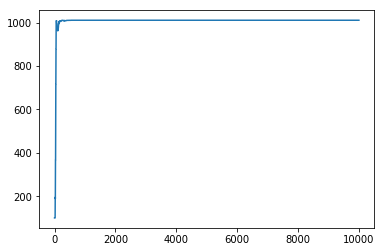

In [12]:
print("Most efficient path::")
print(steps)
plt.plot(scores)
plt.show()